# 10. 인공신경망

# 1. 생물학적 뉴런에서 인공뉴런까지

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 0)

per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

X_new =[[2,0.5], [3,1]]
y_pred = per_clf.predict(X_new)

In [2]:
y_pred

array([ True, False])

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")                      # 파일 저장 경로. 파일명 함께 지정.
    if not tarball_path.is_file():                                   # 아직 다운로드하지 않은 경우
        Path("datasets").mkdir(parents=True, exist_ok=True)          # 폴더 생성
        url = "https://github.com/ageron/data/raw/main/housing.tgz"  # 파일 다운로드
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:          # tgz 파일 압축 풀기
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))         # 압축 풀린 csv 파일 불러오기


In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

housing = load_housing_data()

X = housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]
encoder = OrdinalEncoder()
X['ocean_proximity'] = encoder.fit_transform(X[['ocean_proximity']])
X["total_bedrooms"].fillna(X["total_bedrooms"].median(), inplace=True)

y = housing[['median_house_value']]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# 각각 50개의 뉴런을 가진 3개의 은닉 층으로 구성된 MLP
mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
np.sqrt(rmse)

<ipython-input-6-0a01cf573c9e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ocean_proximity'] = encoder.fit_transform(X[['ocean_proximity']])
<ipython-input-6-0a01cf573c9e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["total_bedrooms"].fillna(X["total_bedrooms"].median(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_

254.44972234788747

In [7]:
rmse

64744.66120291702

# 2. 케라스로 다층 퍼셉트론 구현하기

In [8]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)= fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [10]:
X_train, X_valid, X_test = X_train/225., X_valid/225., X_test/225.

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [12]:
class_names[y_train[0]]

'Ankle Boot'

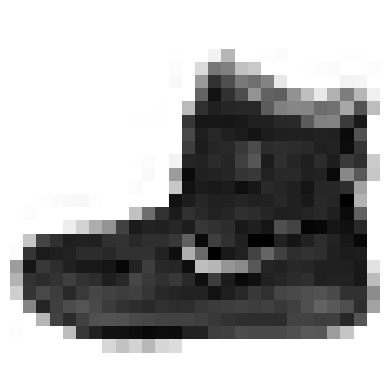

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

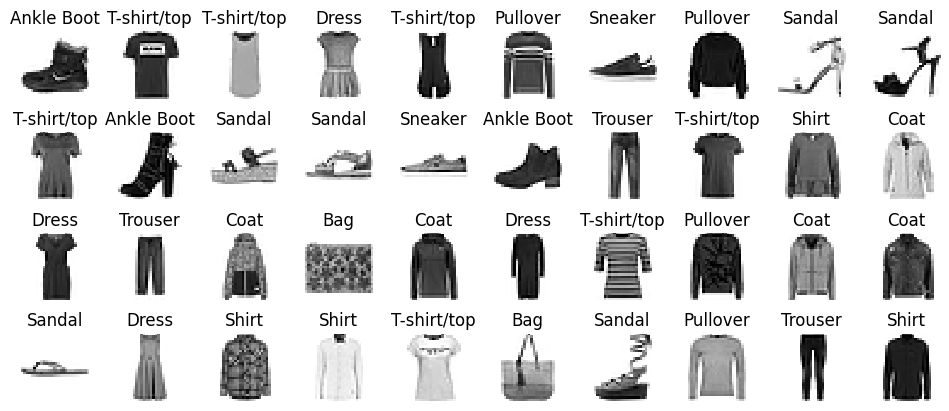

In [14]:
# 그림 10-10
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [15]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.layers

In [18]:
hidden1 = model.layers[1]

In [19]:
hidden1.name

'dense_3'

In [22]:
model.get_layer('dense_3') is hidden1

True

In [23]:
weights, biases = hidden1.get_weights() # 가중치와 b값
weights

array([[-0.00830404,  0.05527008,  0.0444556 , ...,  0.04914191,
        -0.02353329,  0.06327438],
       [-0.07136462, -0.01113363, -0.06584783, ...,  0.01488721,
        -0.0275137 ,  0.05027447],
       [ 0.05330659,  0.00266513, -0.05529647, ...,  0.03692223,
         0.03650321, -0.03559888],
       ...,
       [ 0.02799668, -0.00095997,  0.06064178, ..., -0.05480117,
         0.05410127, -0.02575262],
       [-0.00908572, -0.05250414,  0.07289527, ..., -0.05867098,
        -0.03896671, -0.06649104],
       [-0.03988674, -0.04383529, -0.06102207, ..., -0.06368711,
        -0.0466882 ,  0.03163756]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [27]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
              )

In [28]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.6947 - accuracy: 0.7666 - val_loss: 0.4984 - val_accuracy: 0.8308
Epoch 2/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4796 - accuracy: 0.8337 - val_loss: 0.4582 - val_accuracy: 0.8334
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4330 - accuracy: 0.8477 - val_loss: 0.4206 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4075 - accuracy: 0.8569 - val_loss: 0.3916 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3854 - accuracy: 0.8653 - val_loss: 0.3847 - val_accuracy: 0.8652
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3688 - accuracy: 0.8699 - val_loss: 0.3906 - val_accuracy: 0.8610
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3558 - accuracy: 0.8736 - val_loss: 0.3639 - val_accur

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


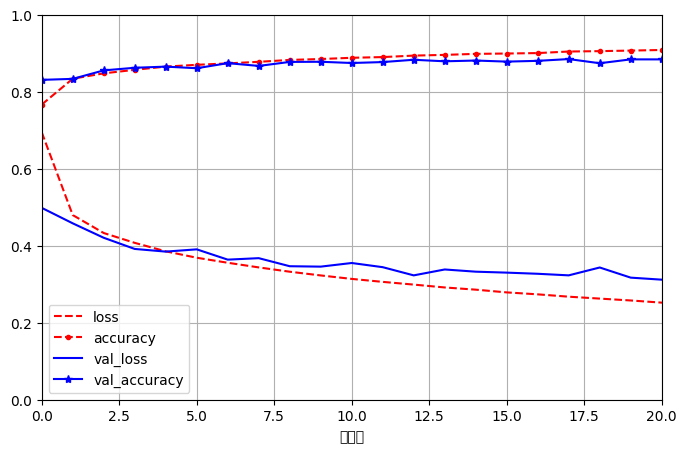

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,20], ylim=[0,1], grid=True, xlabel="에포크",
    style=['r--', 'r--.', 'b-','b-*']
)
plt.show()

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3252 - accuracy: 0.8875


[0.325206995010376, 0.887499988079071]

In [31]:
X_new = X_test[:3] # 새로 만들 수 없어서 임시적으로 그냥 가져옴
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 112ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [33]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [34]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

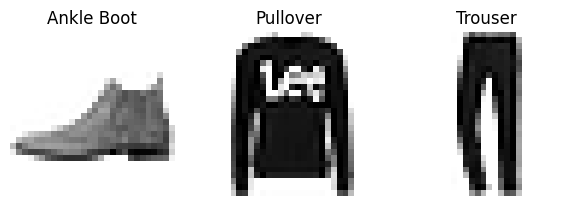

In [35]:
# 그림 10-12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
  plt.subplot(1, 3, index + 1)
  plt.imshow(image, cmap="binary", interpolation="nearest")
  plt.axis('off')
  plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [48]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 15s 8ms/step - loss: 27.6163 - root_mean_squared_error: 5.2551 - val_loss: 27.5422 - val_root_mean_squared_error: 5.2481
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 27.6163 - root_mean_squared_error: 5.2551 - val_loss: 27.5422 - val_root_mean_squared_error: 5.2481
Epoch 3/20
1719/1719 [==============================] - 11s 6ms/step - loss: 27.6163 - root_mean_squared_error: 5.2551 - val_loss: 27.5422 - val_root_mean_squared_error: 5.2481
Epoch 4/20
1719/1719 [==============================] - 10s 6ms/step - loss: 27.6162 - root_mean_squared_error: 5.2551 - val_loss: 27.5422 - val_root_mean_squared_error: 5.2481
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 27.6163 - root_mean_squared_error: 5.2551 - val_loss: 27.5422 - val_root_mean_squared_error: 5.2481
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 27.6162 - root_mean_squared_error: 5.2551

# 3. 신경망 하이퍼파라미터 튜닝하기

In [36]:
%pip install -q -U keras_tuner

tf.keras.backend.clear_session()
tf.random.set_seed(42)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [37]:
import keras_tuner as kt

def build_model(hp):
  n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
  n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
  learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling='log')

  optimizer = hp.Choice('optimizer', values=['sgd', 'adam'])
  if optimizer == 'sgd':
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  for _ in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))

  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [38]:
random_search_tuner = kt.RandomSearch(
    build_model, objective='val_accuracy', max_trials=55, overwrite=True,
    directory='my_fashion_mnist', project_name='my_rnd_search', seed=42)

random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid,y_valid))

Trial 55 Complete [00h 00m 45s]
val_accuracy: 0.6593999862670898

Best val_accuracy So Far: 0.8873999714851379
Total elapsed time: 01h 17m 45s


In [44]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [ ]:
top_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values # 최상의 하이퍼파리미터 값

In [40]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 47 summary
Hyperparameters:
n_hidden: 6
n_neurons: 221
learning_rate: 0.0003647863570162414
optimizer: adam
Score: 0.8873999714851379


In [41]:
best_trial.metrics.get_last_value('val_accuracy')

0.8873999714851379

In [42]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 35s 17ms/step - loss: 0.6369 - accuracy: 0.8676
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2970 - accuracy: 0.8934
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2796 - accuracy: 0.8974
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2807 - accuracy: 0.9003
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2625 - accuracy: 0.9045
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2574 - accuracy: 0.9063
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2492 - accuracy: 0.9092
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2429 - accuracy: 0.9111
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2355 - accuracy: 0.9140
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - lo